<a href="https://colab.research.google.com/github/SPJasti/Machine_learning/blob/main/basic_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

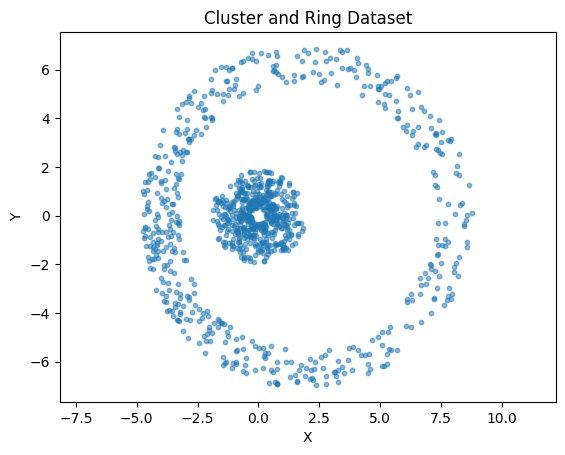

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def generate_cluster_ring_dataset(num_samples, cluster_radius, ring_radius, ring_width, noise_factor):
    # Generate points for the cluster
    theta_cluster = np.random.uniform(0, 2 * np.pi, size=num_samples)
    noise_cluster = np.random.uniform(-noise_factor, noise_factor, size=num_samples)
    x_cluster = (cluster_radius + noise_cluster) * np.cos(theta_cluster)
    y_cluster = (cluster_radius + noise_cluster) * np.sin(theta_cluster)

    # Generate points for the ring
    theta_ring = np.random.uniform(0, 2 * np.pi, size=num_samples)
    noise_ring = np.random.uniform(-noise_factor, noise_factor, size=num_samples)
    x_ring = ((ring_radius + ring_width * np.cos(theta_ring)) + noise_ring) * np.cos(theta_ring)
    y_ring = ((ring_radius + ring_width * np.cos(theta_ring)) + noise_ring) * np.sin(theta_ring)

    # Combine cluster and ring points
    x = np.concatenate((x_cluster, x_ring))
    y = np.concatenate((y_cluster, y_ring))

    return x, y


# Generate dataset
num_samples = 500
cluster_radius = 1.1
ring_radius = 6.0
ring_width = 2.0
noise_factor = 0.8

x, y = generate_cluster_ring_dataset(num_samples, cluster_radius, ring_radius, ring_width, noise_factor)

# Plot the points
plt.scatter(x, y, s=10, alpha=0.5)

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cluster and Ring Dataset')

# Set aspect ratio to equal
plt.axis('equal')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


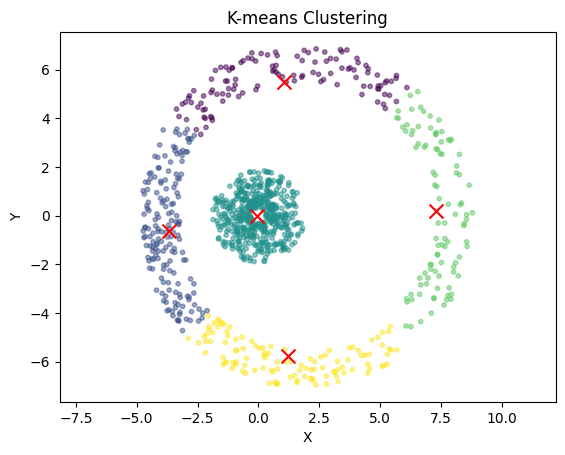

In [14]:
from sklearn.cluster import KMeans

data = np.column_stack((x, y))

# Perform K-means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

# Get the cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the data points with different colors for each cluster
plt.scatter(x, y, c=labels, s=10, alpha=0.5)

# Plot the cluster centers as red crosses
plt.scatter(centers[:, 0], centers[:, 1], marker='x', color='red', s=100)

# Set axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering')

# Set aspect ratio to equal
plt.axis('equal')

# Display the plot
plt.show()